In [3]:
library(readr)
library(limma)
library(edgeR)
library(ggplot2)
library(psych)
sessionInfo()


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




R version 3.6.1 (2019-07-05)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 20.04.1 LTS

Matrix products: default
BLAS/LAPACK: /home/taejoon/miniconda3/lib/R/lib/libRblas.so

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] psych_1.8.12  ggplot2_3.3.2 edgeR_3.28.1  limma_3.42.2  readr_1.3.1  

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.5       pillar_1.4.6     compiler_3.6.1   base64enc_0.1-3 
 [5] tools_3.6.1      digest_0.6.25    uuid_0.1-4       nlme_3.1-149    
 [9] jsonlite_1.7.0   evaluate_0.14    lifecycle_0.2.0  tibble_3.0.3    
[13] gtable_0.3.0     lattice_0.20-41

In [34]:
# Uncomment and change the filename below
#filename_tbl <- 'BOMOR_bwa.indiv_read_count.txt'
filename_tbl <- 'XENLA_bwa.annot.indiv_read_count.txt'
file.exists(filename_tbl)

raw_count <- read.table(filename_tbl, header=TRUE, row.names=1)
raw_cpm <- cpm(raw_count)
head(raw_count)
head(raw_cpm)

min_cpm <- 1
min_cpm_count <- 2

keep <- rowSums(cpm(raw_count)>=min_cpm) >= min_cpm_count
filtered_count <- raw_count[keep,]
filtered_cpm <- cpm(filtered_count)

[1] TRUE

,PM0_3hr_1,PM0_3hr_2,PM0_9hr_1,PM0_9hr_2,PM100_3hr_1,PM100_3hr_2,PM100_9hr_1,PM100_9hr_2
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
NotAvail|1a11.L|rna79833|gene38603,59,53,70,108,54,64,78,106
GTF3A|42sp43.L|rna1356|gene472,4,5,2,2,4,6,2,10
EEF1A2|42sp50.L|rna47641|gene16313,23,48,42,34,20,24,25,39
ACOD1|Acod1.L|rna46631|gene15951,10,18,38,34,8,21,24,44
CD151|LOC100036800.S|rna61218|gene21734,7,5,4,4,2,8,1,4
TSPAN11|LOC100036800|rna8979|gene3099,18,43,18,32,11,16,13,23


,PM0_3hr_1,PM0_3hr_2,PM0_9hr_1,PM0_9hr_2,PM100_3hr_1,PM100_3hr_2,PM100_9hr_1,PM100_9hr_2
NotAvail|1a11.L|rna79833|gene38603,3.240339,2.7078154,3.40207865,4.64906651,3.0431869,3.1549329,3.67671026,4.4321928
GTF3A|42sp43.L|rna1356|gene472,0.219684,0.2554543,0.09720225,0.08609382,0.2254213,0.2957750,0.09427462,0.4181314
EEF1A2|42sp50.L|rna47641|gene16313,1.263183,2.4523611,2.04124719,1.46359501,1.1271063,1.1830998,1.17843278,1.6307125
ACOD1|Acod1.L|rna46631|gene15951,0.549210,0.9196354,1.84684270,1.46359501,0.4508425,1.0352124,1.13129546,1.8397782
CD151|LOC100036800.S|rna61218|gene21734,0.384447,0.2554543,0.19440449,0.17218765,0.1127106,0.3943666,0.04713731,0.1672526
TSPAN11|LOC100036800|rna8979|gene3099,0.988578,2.1969068,0.87482022,1.37750119,0.6199084,0.7887332,0.61278504,0.9617022


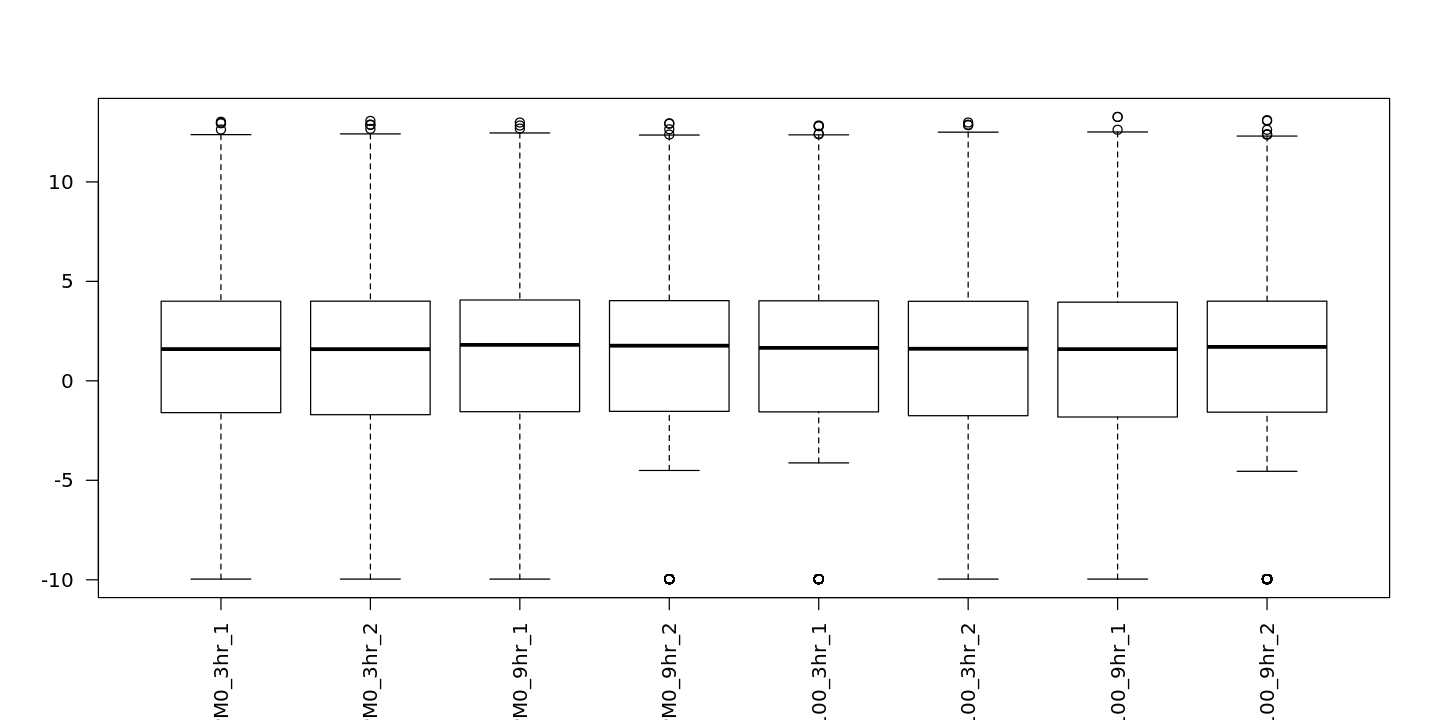

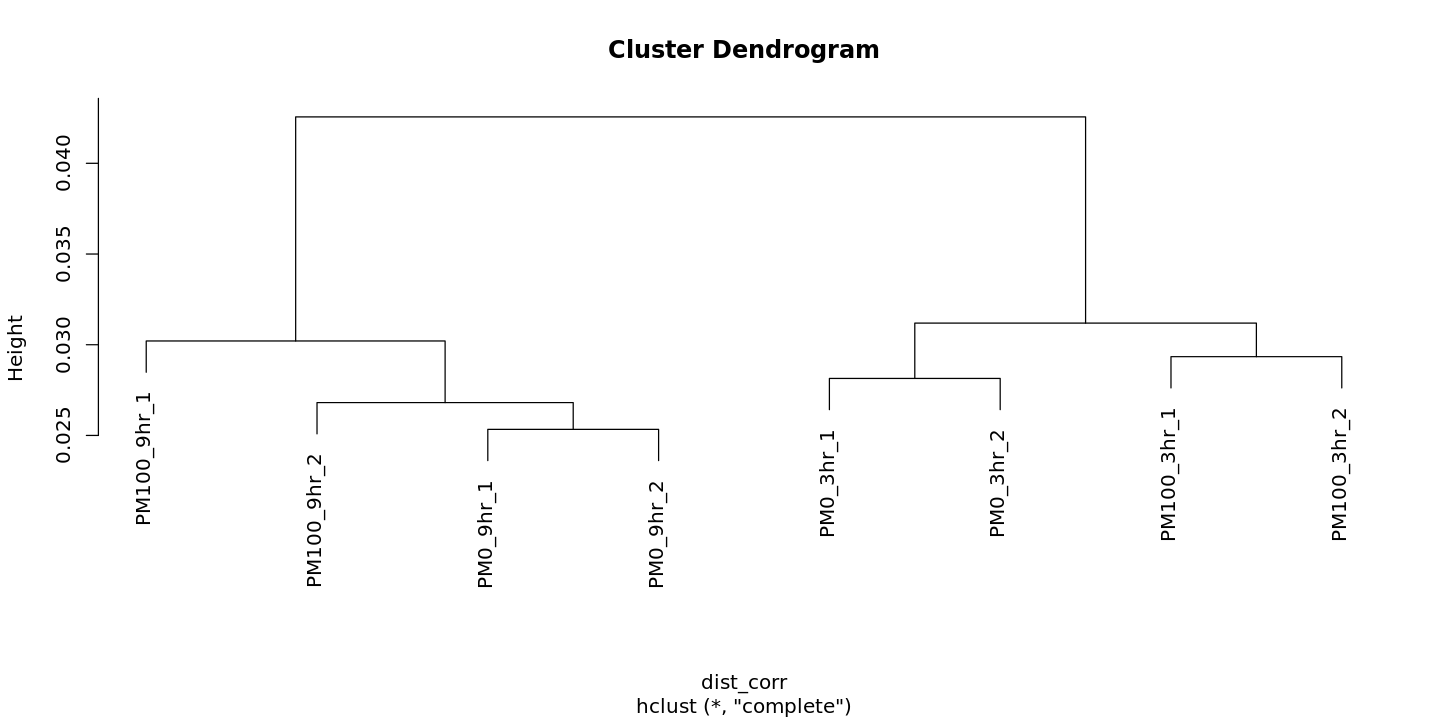

In [35]:
# Boxplot and hierarchical clustering with raw data
options(repr.plot.width=12, repr.plot.height=6)

boxplot(log(raw_cpm+0.001, base=2), las=2)
dist_corr <- dist(1-cor(as.matrix(raw_cpm), method='spearman'))
plot(hclust(dist_corr))

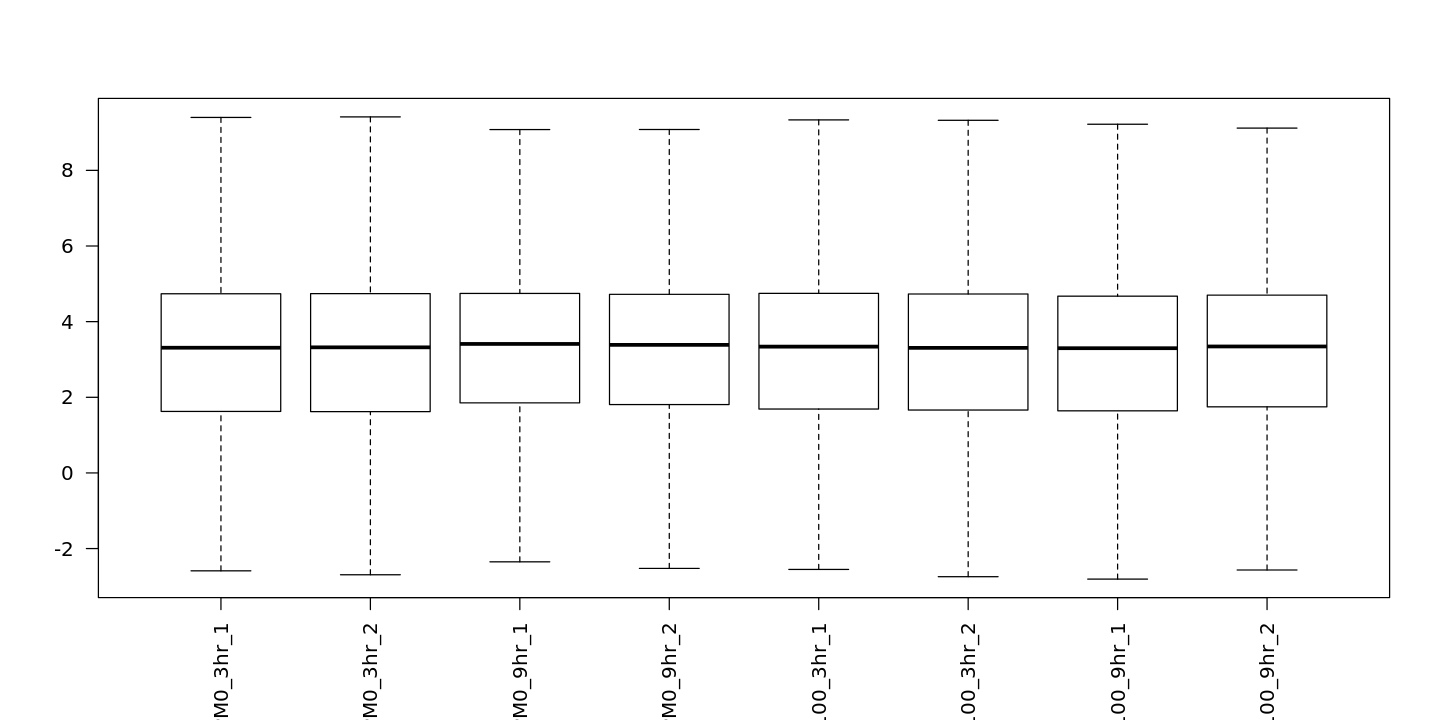

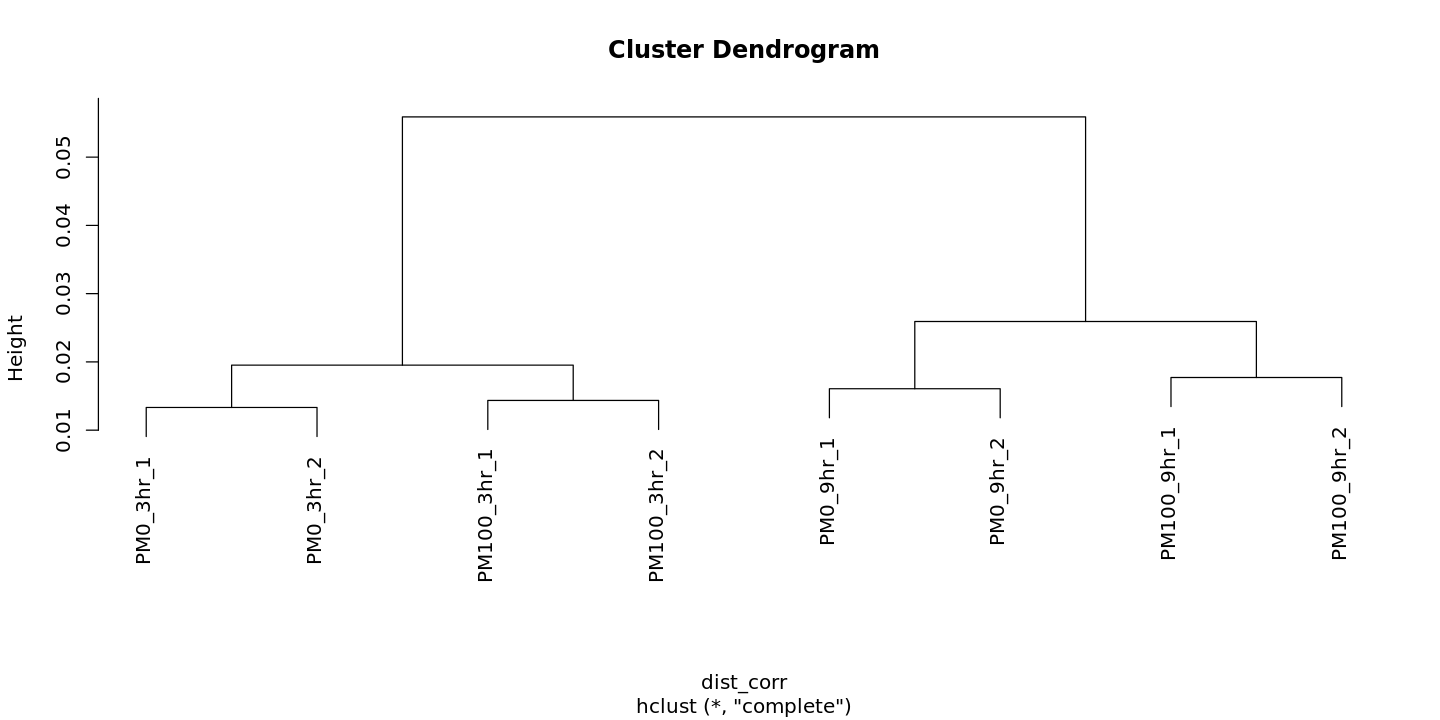

In [36]:
# Boxplot and hierarchical clustering with filtered data
options(repr.plot.width=12, repr.plot.height=6)

boxplot(log(as.matrix(filtered_cpm)+0.001, base=2), las=2, outline=FALSE)
dist_corr <- dist(1-cor(as.matrix(filtered_cpm), method='spearman'))
plot(hclust(dist_corr))

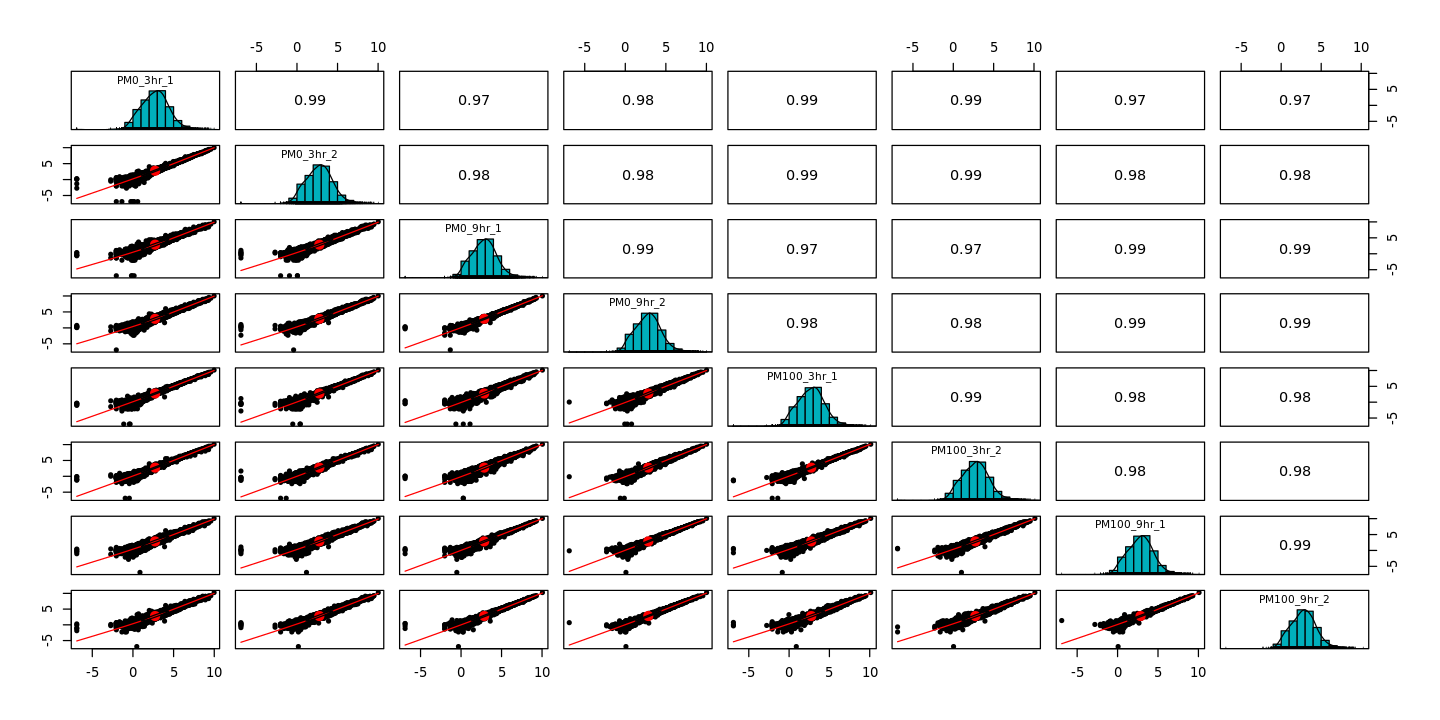

In [37]:
# Pair plot
library(psych)
pairs.panels(log(cpm_filtered+0.001),
             method = "spearman", # correlation method
             hist.col = "#00AFBB",
             density = TRUE,  # show density plots
             ellipses = TRUE # show correlation ellipses
             )

In [38]:
colnames(filtered_count)
groups <- gsub('_\\d+$','',colnames(filtered_count))
groups
batches <- gsub('^\\w+_','',colnames(filtered_count))
batches

# Creating a DGEList object for use in edgeR.
y <- DGEList(counts=filtered_count, group=groups)
design <- model.matrix(~0+groups)
colnames(design) <- gsub('groups', '', colnames(design))
design

v <- voom(y, design)

fit_lm <- lmFit(v, design)
contrast_mat <- makeContrasts(PM100_9hr-PM100_3hr, PM0_9hr-PM0_3hr, PM100_9hr-PM0_9hr, PM100_3hr-PM0_3hr, levels=design)

fit_c <- contrasts.fit(fit_lm, contrast_mat)
fit_c <- eBayes(fit_c)

[1] "PM0_3hr_1"   "PM0_3hr_2"   "PM0_9hr_1"   "PM0_9hr_2"   "PM100_3hr_1"
[6] "PM100_3hr_2" "PM100_9hr_1" "PM100_9hr_2"

[1] "PM0_3hr"   "PM0_3hr"   "PM0_9hr"   "PM0_9hr"   "PM100_3hr" "PM100_3hr"
[7] "PM100_9hr" "PM100_9hr"

[1] "1" "2" "1" "2" "1" "2" "1" "2"

,PM0_3hr,PM0_9hr,PM100_3hr,PM100_9hr
1,1,0,0,0
2,1,0,0,0
3,0,1,0,0
4,0,1,0,0
5,0,0,1,0
6,0,0,1,0
7,0,0,0,1
8,0,0,0,1


In [42]:
#contrast_mat <- makeContrasts(PM100_9hr-PM100_3hr, PM0_9hr-PM0_3hr, PM100_9hr-PM0_9hr, PM100_3hr-PM0_3hr, levels=design)

list_PM100_9vs3 <- topTable(fit_c, coef=1, confint=TRUE, n=Inf, adjust="BH")
list_PM0_9vs3 <- topTable(fit_c, coef=2, confint=TRUE, n=Inf, adjust="BH")
list_PM100vs0_9 <- topTable(fit_c, coef=3, confint=TRUE, n=Inf, adjust="BH")
list_PM100vs0_3 <- topTable(fit_c, coef=4, confint=TRUE, n=Inf, adjust="BH")

head(list_PM100_9vs3)
head(list_PM0_9vs3)

total_list <- list_PM100vs0_3
filename_out <- 'XENLA_PM100vs0_3.bwa'

DE_keep <- total_list$adj.P.Val <= 0.05 & abs(total_list$logFC) >= 1
DE_list <- total_list[DE_keep,]

filename_all <- paste(filename_out, 'limma_all.txt', sep='.')
write.table(total_list, filename_all, sep='\t')

filename_DE <- paste(filename_out, 'limma_DE.txt', sep='.')
write.table(DE_list, filename_DE, sep='\t')

#logCPM <- cpm(tbl_count, log=TRUE)
#filename_cpm <- paste(filename_out, 'abundance.txt', sep='.')
#write.table(txi$abundance, filename_cpm, sep='\t')


,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PCK1|pck1.S|rna54276|gene18590,1.5623587,1.4421631,1.6825542,8.453086,27.47759,2.915310e-15,8.412126e-11,24.99198
AC139530.2|slc25a10.L|rna14835|gene5080,1.4547197,1.2720153,1.6374241,5.739499,16.83127,7.478948e-12,1.052198e-07,17.22647
GLUD1|glud1.L|rna27302|gene9382,1.2202356,1.0617168,1.3787545,8.588321,16.27231,1.270185e-11,1.052198e-07,16.98778
NotAvail|LOC108703229|rna89327|gene45103,1.0153316,0.8812179,1.1494453,7.795149,16.00373,1.647814e-11,1.052198e-07,16.72207
PCK1|pck1.L|rna41975|gene14419,0.7438524,0.6449595,0.8427453,9.276709,15.90040,1.823251e-11,1.052198e-07,16.61365
STIP1|stip1.L|rna43583|gene14930,-0.9984317,-1.1333432,-0.8635202,7.172815,-15.64429,2.348806e-11,1.129580e-07,16.35189


,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PCK1|pck1.S|rna54276|gene18590,2.2440954,2.1103661,2.377825,8.453086,35.47326,4.520306e-17,1.304334e-12,28.08658
PCK1|pck1.L|rna41975|gene14419,0.9763457,0.8732251,1.079466,9.276709,20.01449,4.811568e-13,6.941889e-09,20.20503
DYNLL1|dynll1.L|rna17192|gene5870,-1.2154972,-1.3486648,-1.082330,7.310375,-19.29486,8.622978e-13,7.131363e-09,19.45822
DYNLL2|dynll1.S|rna21899|gene7511,-1.3271080,-1.4737584,-1.180458,6.782860,-19.12977,9.885792e-13,7.131363e-09,19.23374
TRIM69|xnf7.L|rna27417|gene9424,-1.2059737,-1.3420126,-1.069935,7.231010,-18.73964,1.371371e-12,7.914184e-09,19.00866
COL11A1|LOC108713331|rna94622|gene48858,1.2834426,1.1280218,1.438863,6.611060,17.45636,4.212727e-12,2.025970e-08,17.87154
